## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [7, 4]

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('./data/cleaned_student_lifetyle_dataset.csv')

In [3]:
df.head()

,Student_ID,Study_Hours,Extracurricular_Hours,Sleep_Hours,Social_Hours,Physical_Activity_Hours,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [4]:
df.head()

,Student_ID,Study_Hours,Extracurricular_Hours,Sleep_Hours,Social_Hours,Physical_Activity_Hours,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [5]:
df.shape

(1954, 8)

In [6]:
df['Stress_Level'] = pd.Categorical(df['Stress_Level'], ordered=True, categories=['Low', 'Moderate', 'High'])

## Classification Practice

In [7]:
X = df.drop(columns=['Stress_Level', 'GPA', 'Student_ID'])
y = df['Stress_Level']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, stratify=y, random_state=42)

In [9]:
sc = StandardScaler()

In [10]:
X_train_sc = sc.fit_transform(X_train)

In [11]:
X_test_sc = sc.transform(X_test)

In [12]:
scores = []
for neighbors in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    knn.fit(X_train_sc, y_train)
    scores.append({'K': neighbors, 'Score': knn.score(X_test_sc, y_test)})

In [13]:
scores_df = pd.DataFrame(scores)

In [14]:
scores_df.sort_values(by='Score', ascending=False)

,K,Score
15,16,0.948864
14,15,0.945076
16,17,0.943182
17,18,0.943182
8,9,0.943182
26,27,0.943182
9,10,0.941288
20,21,0.941288
19,20,0.941288
18,19,0.939394


<Axes: xlabel='K', ylabel='Score'>

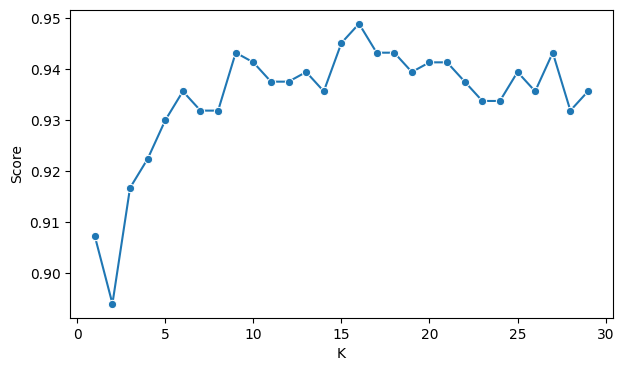

In [15]:
sns.lineplot(data=scores_df, x='K', y='Score', marker='o')

> An n_neighbors of 17 seems to work the best (16,17,18 all have the same accuracy), with an accuracy score of ~0.92

In [16]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_sc, y_train)

,n_neighbors,17
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [17]:
y_preds = knn.predict(X_test_sc)

In [18]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

        High       0.95      0.99      0.97       271
         Low       0.94      0.86      0.90        76
    Moderate       0.93      0.92      0.92       181

    accuracy                           0.94       528
   macro avg       0.94      0.92      0.93       528
weighted avg       0.94      0.94      0.94       528



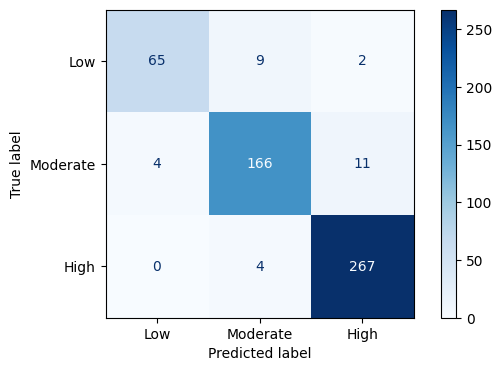

In [19]:
ConfusionMatrixDisplay.from_estimator(knn, X_test_sc, y_test, cmap='Blues', labels=['Low', 'Moderate', 'High'])

In [20]:
import joblib

In [21]:
joblib.dump(knn, 'class.pkl')

['class.pkl']

In [24]:
joblib.dump(sc, 'scaler.pkl')

['scaler.pkl']

In [22]:
X_test.head()

,Study_Hours,Extracurricular_Hours,Sleep_Hours,Social_Hours,Physical_Activity_Hours
1096,7.8,3.7,9.0,1.6,1.9
1122,7.7,0.4,7.1,5.1,3.7
1894,8.1,2.9,8.4,2.2,2.4
1409,7.9,2.9,9.6,2.5,1.1
1143,6.9,3.0,7.7,0.5,5.9


In [23]:
y_test.head()

1096    Moderate
1122    Moderate
1894        High
1409    Moderate
1143    Moderate
Name: Stress_Level, dtype: category
Categories (3, object): ['Low' < 'Moderate' < 'High']